# Finding Alpha and Beta in Capital Asset Pricing Model

In [77]:
#Mushfiqur Rahman [Mushfiq] 
#Modeling CAPM as a simple linear regression
#import

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
import pandas_datareader
import datetime

In [80]:
import pandas_datareader.data as web

In [81]:
#get closing value of Tesla, AMaZoN and SPX

In [82]:
start = datetime.datetime(2014, 1, 3)
end = datetime.date.today()

In [83]:
tsla_raw = web.DataReader("TSLA", 'morningstar', start, end)
tsla = tsla_raw.loc['TSLA']

In [84]:
amzn_raw = web.DataReader("AMZN", 'morningstar', start, end)
amzn = amzn_raw.loc['AMZN']
len(amzn)

1176

In [85]:
spx_raw = web.DataReader("SPY", 'morningstar', start, end)
spx = spx_raw.loc['SPY']
len(spx)

1177

In [86]:
spx=spx[0:len(amzn)]

In [87]:
amzn.head()

,Close,High,Low,Open,Volume
Date,,,,,
2014-01-03,396.44,402.71,396.22,398.29,2213512
2014-01-06,393.63,397.00,388.42,396.13,3172207
2014-01-07,398.03,398.47,394.29,395.04,1916684
2014-01-08,401.92,403.00,396.04,398.47,2316903
2014-01-09,401.01,406.89,398.44,403.75,2103793


In [88]:
from scipy import stats

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline

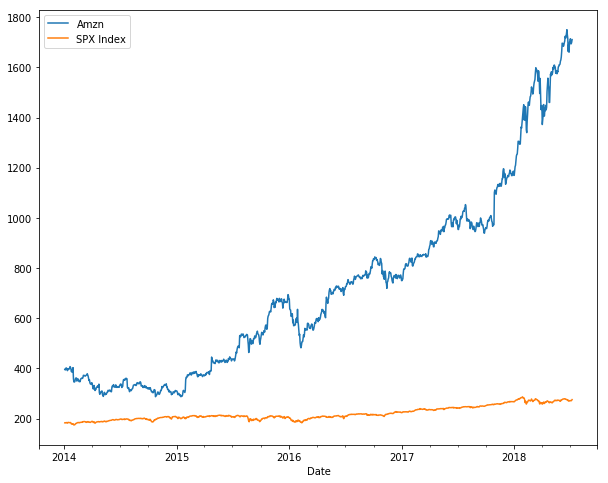

In [90]:
#tsla.plot(label='tsla',figsize=(10,8))
amzn['Close'].plot(label='Amzn',figsize=(10,8))
spx['Close'].plot(label='SPX Index')
plt.legend()

## Compare cumulative return 

In [91]:
import warnings
warnings.filterwarnings('ignore')

amzn['Cumulative'] = amzn['Close']/amzn['Close'].iloc[0]
spx['Cumulative'] = spx['Close']/spx['Close'].iloc[0]

Text(0.5,1,'Cumulative Return')

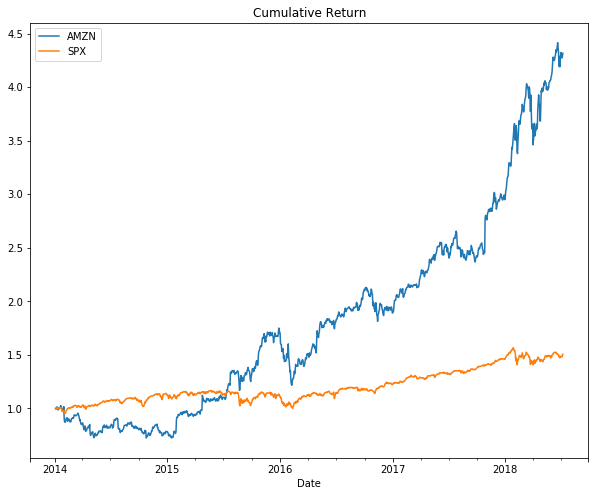

In [92]:
amzn['Cumulative'].plot(label='AMZN',figsize=(10,8))
spx['Cumulative'].plot(label='SPX')
plt.legend()
plt.title('Cumulative Return')

## Calculate Daily return

In [93]:
amzn['Daily Return'] = amzn['Close'].pct_change(1)
spx['Daily Return'] = spx['Close'].pct_change(1)
len(spx['Daily Return'])

1176

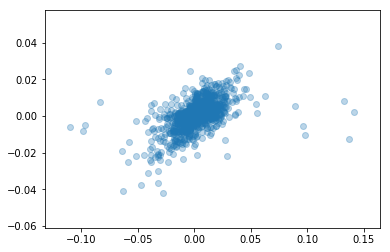

In [94]:
plt.scatter(amzn['Daily Return'].dropna(),spx['Daily Return'].dropna(),alpha=0.3)

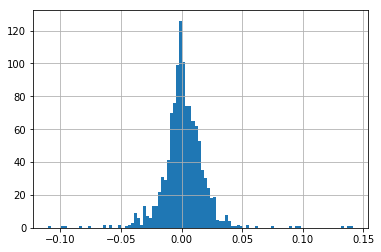

In [95]:
amzn['Daily Return'].hist(bins=100)

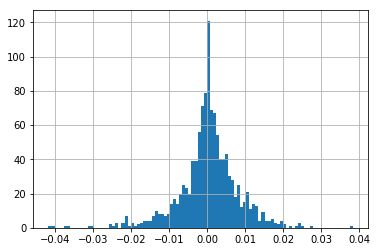

In [96]:
spx['Daily Return'].hist(bins=100)

In [97]:
beta,alpha,r_value,p_value,std_err = stats.linregress(spx['Daily Return'].iloc[2:], amzn['Daily Return'].iloc[2:])

In [98]:
beta

1.1851653025319313

In [99]:
alpha

0.0009643170281417176

In [100]:
#using statsmodel 
import statsmodels.api as sm


In [101]:
X = spx['Daily Return'].iloc[1:]
y = amzn['Daily Return'].iloc[1:]

In [102]:
# Add a constant to the independent value
X1 = sm.add_constant(X)


In [103]:
# make regression model 
model = sm.OLS(y, X1)

In [104]:
# fit model and print results
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Daily Return   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     411.7
Date:                Mon, 09 Jul 2018   Prob (F-statistic):           1.09e-78
Time:                        16:46:15   Log-Likelihood:                 3215.9
No. Observations:                1175   AIC:                            -6428.
Df Residuals:                    1173   BIC:                            -6418.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0010      0.000      2.096   